In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hr.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#coulumns which has options
print(df["Department"].unique())
print(df["BusinessTravel"].unique())
print(df["EducationField"].unique())
print(df["Gender"].unique())
print(df["Attrition"].unique())
print(df["JobRole"].unique())
print(df["MaritalStatus"].unique())
print(df["OverTime"].unique())
print(df["Attrition"].unique())

['Sales' 'Research & Development' 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Yes' 'No']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']
['Yes' 'No']


In [10]:
#change columns to 0 and 1
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['Department','BusinessTravel','EducationField','Gender','Attrition','JobRole','MaritalStatus','OverTime',"Attrition"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [103]:
#Mean>Median in chol,thalach- data can be skewed
#Large difference between 75% and max outliers may be present
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


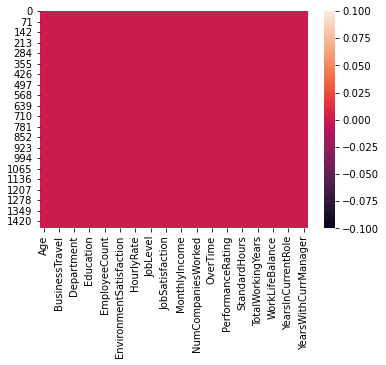

In [13]:
#No null value present 
sns.heatmap(df.isnull())

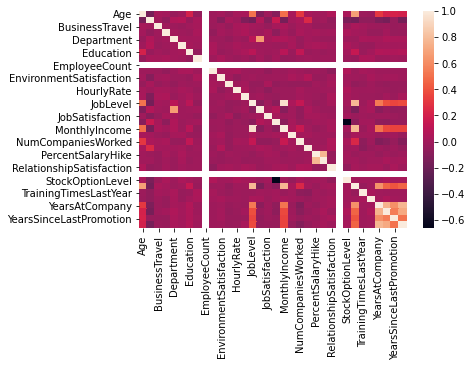

In [14]:
#EmployeeCount,StandardHours and over 18 are single value
#few columns are missing 
dfcor=df.corr()
sns.heatmap(dfcor)

Age                            AxesSubplot(0.125,0.657941;0.0545775x0.222059)
Attrition                   AxesSubplot(0.190493,0.657941;0.0545775x0.222059)
BusinessTravel              AxesSubplot(0.255986,0.657941;0.0545775x0.222059)
DailyRate                   AxesSubplot(0.321479,0.657941;0.0545775x0.222059)
Department                  AxesSubplot(0.386972,0.657941;0.0545775x0.222059)
DistanceFromHome            AxesSubplot(0.452465,0.657941;0.0545775x0.222059)
Education                   AxesSubplot(0.517958,0.657941;0.0545775x0.222059)
EducationField              AxesSubplot(0.583451,0.657941;0.0545775x0.222059)
EmployeeCount               AxesSubplot(0.648944,0.657941;0.0545775x0.222059)
EmployeeNumber              AxesSubplot(0.714437,0.657941;0.0545775x0.222059)
EnvironmentSatisfaction      AxesSubplot(0.77993,0.657941;0.0545775x0.222059)
Gender                      AxesSubplot(0.845423,0.657941;0.0545775x0.222059)
HourlyRate                     AxesSubplot(0.125,0.391471;0.0545

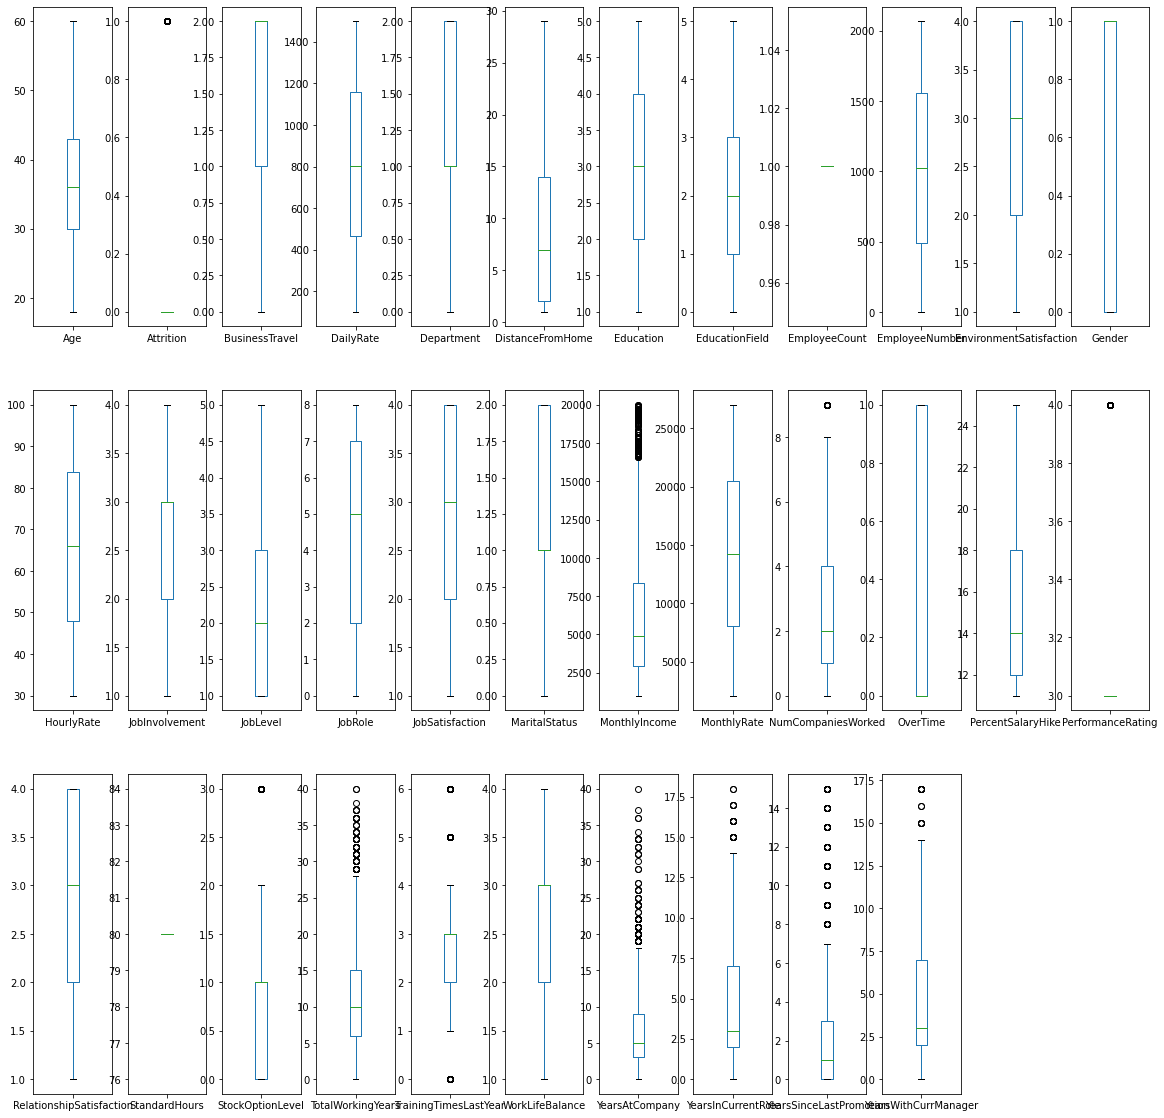

In [15]:
# Outliers are present 
df.plot(kind='box',subplots=True,layout=(3,12),figsize=(20,20))

In [16]:
#Column can be droped("EmployeeCount","StandardHours") single value
df=df.drop(["EmployeeCount","StandardHours"],axis=1)

In [17]:
#Column can be droped("EmployeeCount","Stan") single value
df=df.drop(["Over18"],axis=1)

In [18]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [35]:
#Remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [20]:
print(df.shape) #dataset
print(df_new.shape) #Outlier

(1470, 32)
(1387, 32)


In [36]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [21]:
#Skewness
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

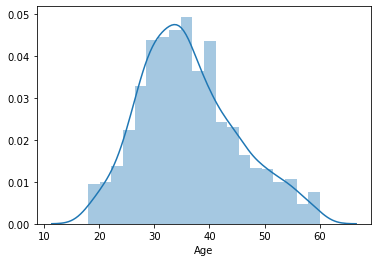

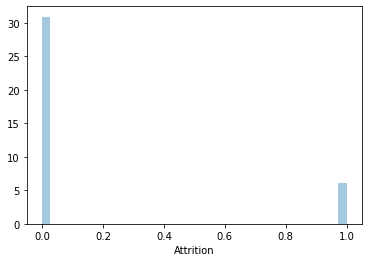

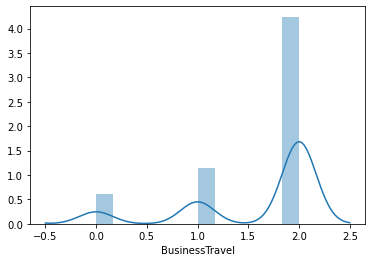

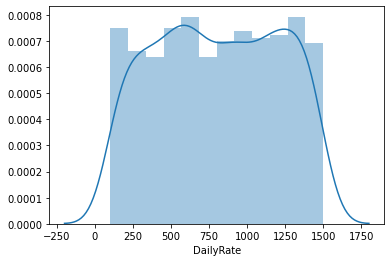

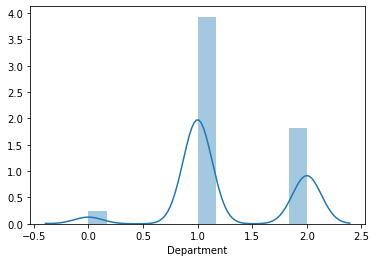

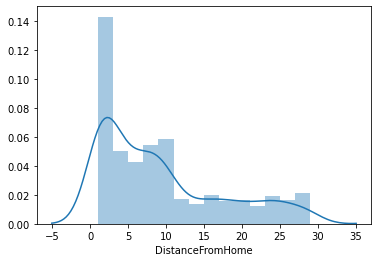

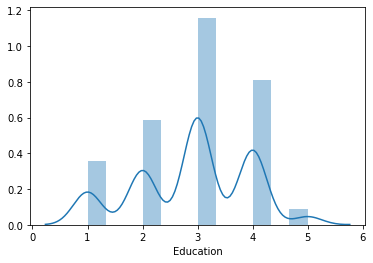

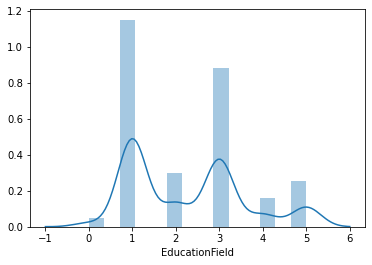

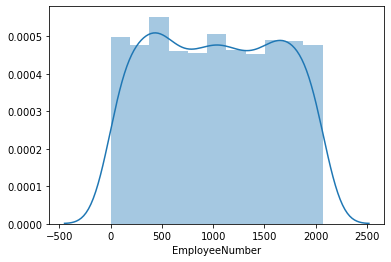

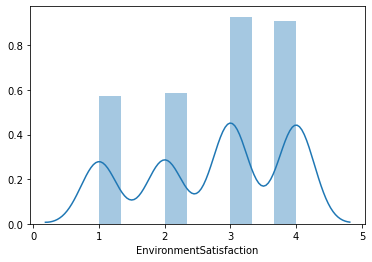

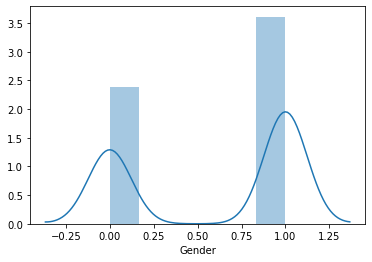

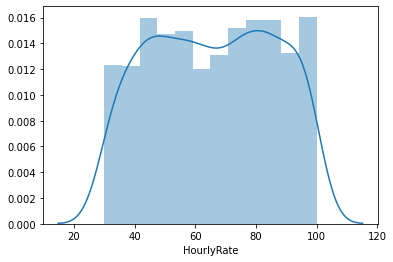

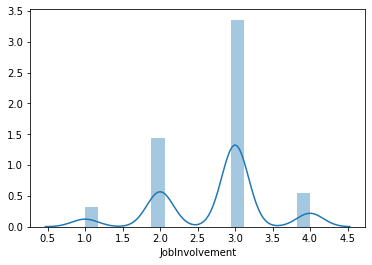

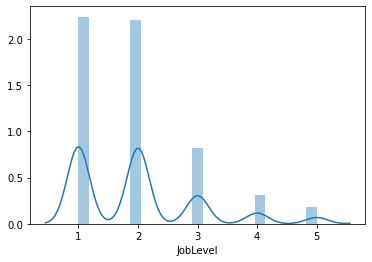

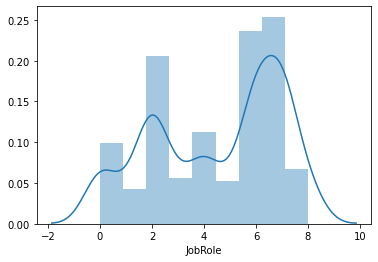

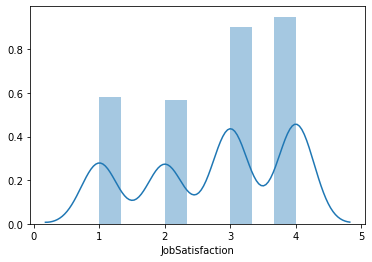

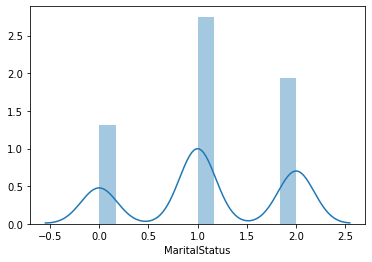

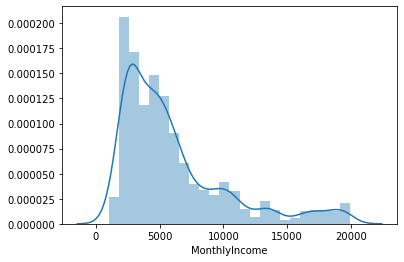

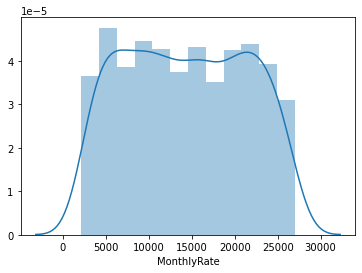

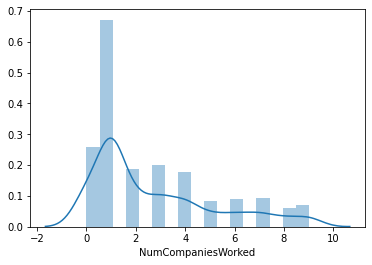

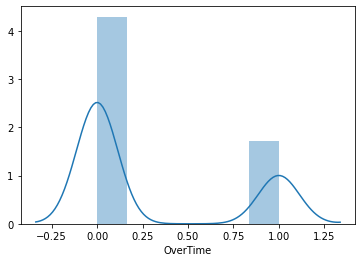

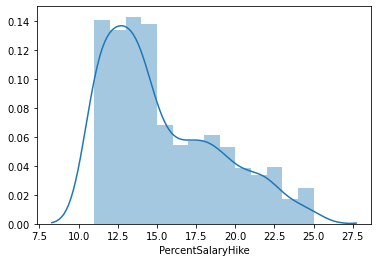

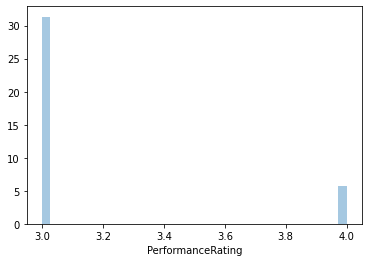

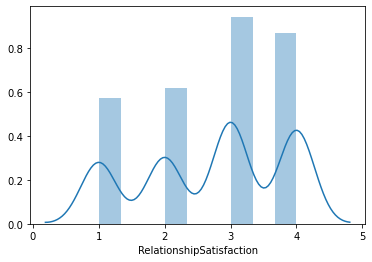

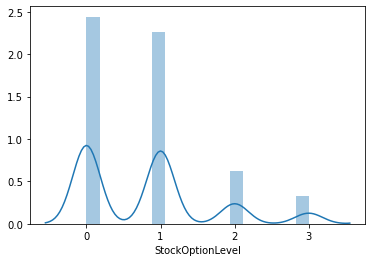

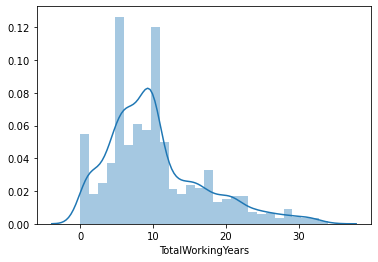

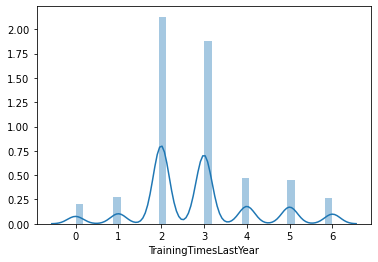

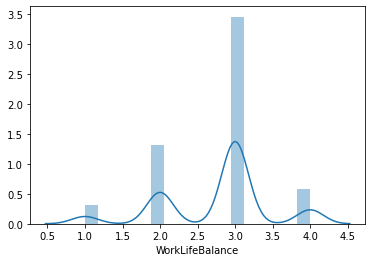

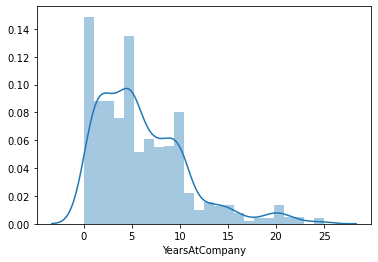

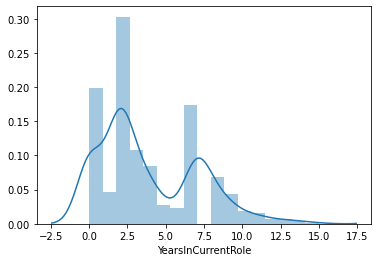

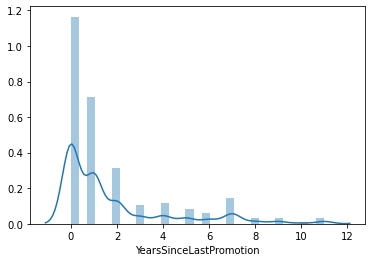

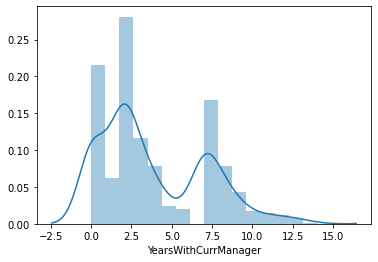

In [22]:
#Distancefromhome, monthlyincome,numcompaniesworked,percentsalaryhike,totalworking years,yearsatcompany-Right skewed
#Hourlyrate,hourlyincome,dailyrate-Large distribution
collist=df.columns.values
ncol=10
nrow=20
for i in df.columns:
    sns.distplot(df_new[i])
    plt.show()

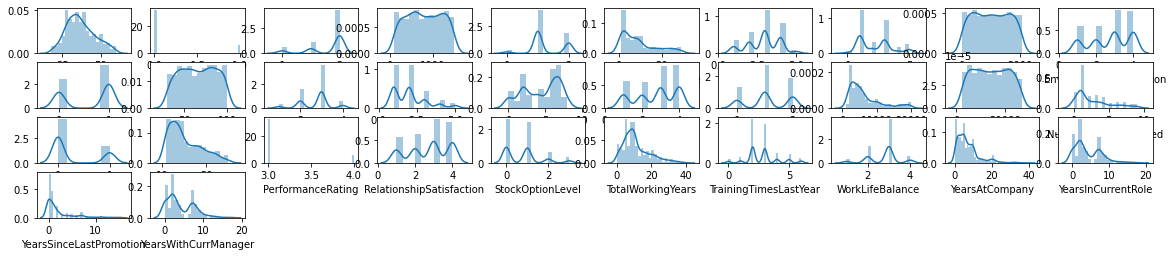

In [23]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [24]:
#remove skewness
import numpy as np
from sklearn.preprocessing import power_transform
pt=power_transform(df_new,method='yeo-johnson')
df_new=pd.DataFrame(pt,columns=df_new.columns)

In [88]:
#Skew after removal
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [89]:
#Visual

Text(0.5, 0, '0-Female    1-Male')

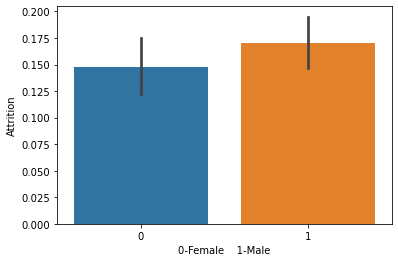

In [90]:
#Male has more chances to leave
sns.barplot(x="Gender",y="Attrition",data=df)
plt.xlabel("0-Female    1-Male")

Text(0.5, 0, '0-Divorced    1-Married    2-Single')

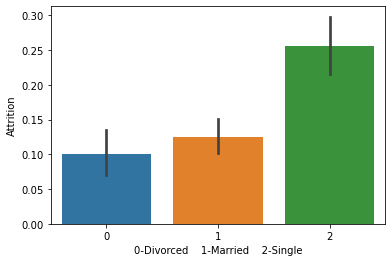

In [91]:
#Single has more chances to leave
sns.barplot(x="MaritalStatus",y="Attrition",data=df)
plt.xlabel("0-Divorced    1-Married    2-Single")

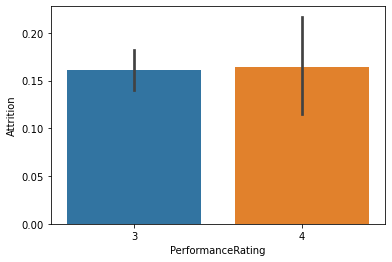

In [92]:
#Almost same performance for both
sns.barplot(x="PerformanceRating",y="Attrition",data=df)

Text(0.5, 0, '0-non-Travel   1-Travel_Frequently    2-Travel_Rarely  ')

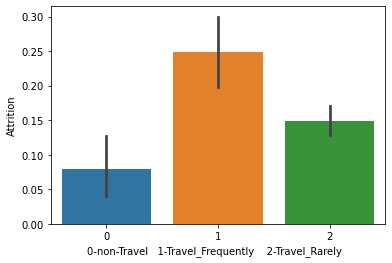

In [93]:
#travel frequestly has more chances to leave
sns.barplot(x="BusinessTravel",y="Attrition",data=df)
plt.xlabel("0-non-Travel   1-Travel_Frequently    2-Travel_Rarely  ")

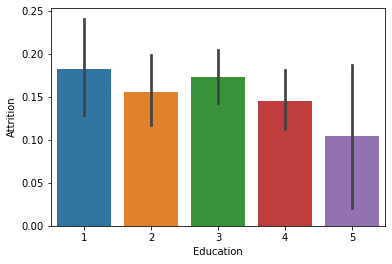

In [94]:
#Less value of education has more chances to leave
sns.barplot(x="Education",y="Attrition",data=df)

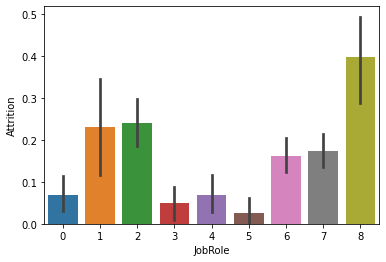

In [95]:
#Laboratory Technician has more chances to leave when compared to other role
sns.barplot(x="JobRole",y="Attrition",data=df)

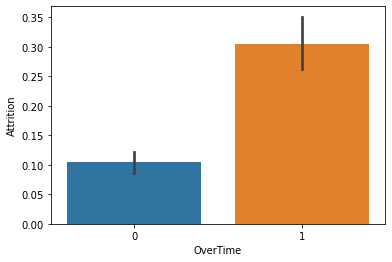

In [96]:
#Overtime done more chances to leave
sns.barplot(x="OverTime",y="Attrition",data=df)

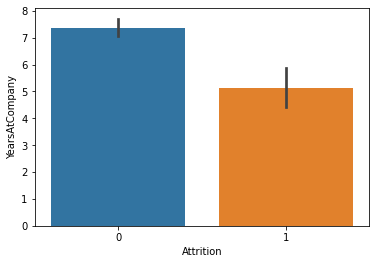

In [97]:
#less number of years more chances to leave 
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)

In [51]:
df_x=df_new.drop(columns=['Attrition'])
y=pd.DataFrame(df_new['Attrition'])
x=pd.DataFrame(df_x)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [53]:
print(x_train.shape, '\t', x_test.shape)
print(y_train.shape, '\t', y_test.shape)

(970, 31) 	 (417, 31)
(970, 1) 	 (417, 1)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
model=[LogisticRegression(),DecisionTreeRegressor(),GaussianNB()]
for m in model:
    m.fit(x_train,y_train)
    print('score',m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score",accuracy_score(y_test,predm))
    print("confusion matrix",confusion_matrix(y_test,predm))
    print("classification report",classification_report(y_test,predm))
    print("*********************************************")
    print("\n")

score LogisticRegression() is 0.8474226804123711
accuracy score 0.8273381294964028
confusion matrix [[342   3]
 [ 69   3]]
classification report               precision    recall  f1-score   support

           0       0.83      0.99      0.90       345
           1       0.50      0.04      0.08        72

    accuracy                           0.83       417
   macro avg       0.67      0.52      0.49       417
weighted avg       0.77      0.83      0.76       417

*********************************************


score DecisionTreeRegressor() is 1.0
accuracy score 0.8057553956834532
confusion matrix [[305  40]
 [ 41  31]]
classification report               precision    recall  f1-score   support

           0       0.88      0.88      0.88       345
           1       0.44      0.43      0.43        72

    accuracy                           0.81       417
   macro avg       0.66      0.66      0.66       417
weighted avg       0.80      0.81      0.81       417

********************

LogisticRegression-84.7
DTC-100
Gaussian-76.9
Best Model-LogisticRegression

In [70]:
#cross validation
from sklearn.model_selection import cross_val_score
lg=LogisticRegression()
svcscores=cross_val_score(lg,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.84172662 0.8381295  0.84476534 0.83754513 0.84476534]
0.8413863854764564 0.003108474355370595


In [87]:
#using LG as best model
lg.fit(x_train,y_train)
print(lg.score(x_train,y_train))
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8474226804123711
0.8273381294964028
[[342   3]
 [ 69   3]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       345
           1       0.50      0.04      0.08        72

    accuracy                           0.83       417
   macro avg       0.67      0.52      0.49       417
weighted avg       0.77      0.83      0.76       417



In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9783505154639175
0.8513189448441247
[[334  11]
 [ 51  21]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       345
           1       0.66      0.29      0.40        72

    accuracy                           0.85       417
   macro avg       0.76      0.63      0.66       417
weighted avg       0.83      0.85      0.83       417



In [73]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(base_estimator=lg,n_estimators=20,learning_rate=0.1,random_state=42,algorithm='SAMME')
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(ab.score(x_train,y_train))
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8381443298969072
0.8249400479616307
[[333  12]
 [ 61  11]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       345
           1       0.48      0.15      0.23        72

    accuracy                           0.82       417
   macro avg       0.66      0.56      0.57       417
weighted avg       0.78      0.82      0.79       417



In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.1,random_state=42)
gb.fit(x_train,y_train)
predgb=ab.predict(x_test)
print(gb.score(x_train,y_train))
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8804123711340206
0.8249400479616307
[[333  12]
 [ 61  11]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       345
           1       0.48      0.15      0.23        72

    accuracy                           0.82       417
   macro avg       0.66      0.56      0.57       417
weighted avg       0.78      0.82      0.79       417



RFC-97.8
Adaboost-83
GradientBoosting-88

In [98]:
#AUC ROC is tried for logistic regresssion
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.36096449, 0.0238947 , 0.12946567, 0.42800956, 0.22358834,
       0.07514271, 0.39854807, 0.10035364, 0.01067575, 0.01280332,
       0.17695384, 0.07356215, 0.26831149, 0.13989182, 0.12893422,
       0.28303065, 0.29472221, 0.04833255, 0.20569756, 0.26771608,
       0.19713976, 0.17491665, 0.15882741, 0.0106648 , 0.41162767,
       0.07778955, 0.13849302, 0.4070449 , 0.33450141, 0.0760987 ,
       0.0941526 , 0.19223036, 0.23261421, 0.23434734, 0.14015403,
       0.13760091, 0.2527563 , 0.11942101, 0.03777421, 0.13548049,
       0.52340971, 0.26749106, 0.26266476, 0.43806511, 0.16071441,
       0.16445511, 0.2505156 , 0.19108175, 0.12118185, 0.18000629,
       0.22672752, 0.21040796, 0.24594981, 0.13777806, 0.17598583,
       0.22695031, 0.0849737 , 0.41542633, 0.31240105, 0.2868782 ,
       0.0412737 , 0.07166855, 0.1043443 , 0.21285485, 0.17941645,
       0.26204405, 0.14557653, 0.02139491, 0.08770674, 0.02078658,
       0.23773231, 0.28650852, 0.13649986, 0.31985398, 0.23465

In [99]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(threshold)

[0.         0.00289855 0.00289855 0.0115942  0.0115942  0.0173913
 0.0173913  0.02608696 0.02608696 0.03478261 0.03478261 0.03768116
 0.03768116 0.04057971 0.04057971 0.04347826 0.04347826 0.04927536
 0.04927536 0.05217391 0.05217391 0.06086957 0.06086957 0.06956522
 0.06956522 0.07246377 0.07246377 0.08115942 0.08115942 0.08695652
 0.08695652 0.11594203 0.11594203 0.12753623 0.12753623 0.13333333
 0.13333333 0.15362319 0.15362319 0.15942029 0.15942029 0.16521739
 0.16521739 0.17391304 0.17391304 0.17681159 0.17681159 0.1826087
 0.1826087  0.1942029  0.1942029  0.19710145 0.19710145 0.21449275
 0.21449275 0.22028986 0.22028986 0.24347826 0.24347826 0.30144928
 0.30144928 0.35942029 0.35942029 0.37391304 0.37391304 0.43768116
 0.43768116 0.44347826 0.44347826 0.46666667 0.46666667 0.46956522
 0.46956522 0.47826087 0.47826087 0.49565217 0.49565217 0.52173913
 0.52173913 0.57971014 0.57971014 0.59710145 0.59710145 0.61449275
 0.61449275 0.65507246 0.65507246 0.70434783 0.70434783 0.710144

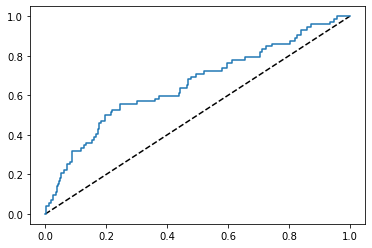

In [100]:
#Less area covered under graph 
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LR')

In [101]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.5164855072463769
